# Data Collection

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Uploading the dataset to the notebook from its original source, PhysioNet.

In [ ]:
!wget -r -N -c -np https://physionet.org/files/wearable-exam-stress/1.0.0/

--2024-01-07 12:47:52--  https://physionet.org/files/wearable-exam-stress/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/wearable-exam-stress/1.0.0/index.html’

physionet.org/files     [ <=>                ]     822  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2024-01-07 12:47:53 (262 MB/s) - ‘physionet.org/files/wearable-exam-stress/1.0.0/index.html’ saved [822]

Loading robots.txt; please ignore errors.
--2024-01-07 12:47:53--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 22 [text/plain]
Saving to: ‘physionet.org/robots.txt’

physionet.org/robot 100%[===================>]      22  --.-KB/s    in 0s      

2024-01-07 12:47:53 (9.37 MB/s) - ‘physionet.org/robot

#Preprocessing

There is physiological data for each student during each exam, namely Midterm 1, Midterm 2, and the Final Exam. The dataset for each exam consists of electrodermal activity, heart rate, blood volume pulse, skin surface temperature, inter-beat intervals, and accelerometer data, each stored in separate .csv files. I only utilized a subset of the features to reduce complexity and focus on the features most relevant to my analysis.

- Among the three exams—Midterm 1, Midterm 2, and Final—I decided to use the final exam data because it has the longest duration (three hours) and provides a substantial amount of data, with more than 90,000 rows for each physiological measurement.  
- Out of the six physiological features—electrodermal activity, heart rate, blood volume pulse, skin surface temperature, inter-beat intervals, and accelerometer data—I decided to use electrodermal activity and body temperature, as these have been shown to be influenced by stress.

Overview of the EDA feature in student 1 - 3

In [ ]:
eda_s1 = pd.read_csv('/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S1/Final/EDA.csv')
eda_s1

,1544027337.000000
0,4.000000
1,0.000000
2,0.005125
3,0.020501
4,0.021783
...,...
93578,0.025627
93579,0.025627
93580,0.026908
93581,0.025627


In [ ]:
eda_s2 = pd.read_csv('/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S2/Final/EDA.csv',)
eda_s2

,1544027344.000000
0,4.000000
1,0.000000
2,0.003844
3,0.015376
4,0.017939
...,...
101342,0.016657
101343,0.014095
101344,0.014095
101345,0.015376


In [ ]:
eda_s3 = pd.read_csv('/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S3/Final/EDA.csv',)
eda_s3

,1544027334.000000
0,4.000000
1,0.000000
2,0.003844
3,0.016658
4,0.017940
...,...
103280,0.000000
103281,0.000000
103282,0.000000
103283,0.000000


From the previous process, it can be seen that each EDA file for each student contains more than 90,000 rows. This large number of rows can become a bottleneck in the subsequent stages. Therefore, I decided to group the data into sets of 100 rows, calculate the average for each group, and use these averages as the new rows.

In [ ]:
# Creating a function to process data grouping
def process_eda_file(file_path):
    # Reading the CSV file
    eda = pd.read_csv(file_path)

    # Extracting the column name from each EDA file as their names vary
    original_column_name = eda.columns[0]

    # Renaming the column name of different EDA files to 'EDA'
    eda.rename(columns={original_column_name: 'EDA'}, inplace=True)

    # Grouping the data into sets of 100 rows and calculating the mean
    eda = eda.groupby(eda.index // 100).agg({'EDA': 'mean'}).reset_index(drop=True)

    print(f"Processed EDA file: {file_path}")
    print(eda.describe())

    return eda

# List of file paths for each student's EDA file
file_paths = [
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S1/Final/EDA.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S2/Final/EDA.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S3/Final/EDA.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S4/Final/EDA.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S5/Final/EDA.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S6/Final/EDA.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S7/Final/EDA.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S8/Final/EDA.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S9/Final/EDA.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S10/Final/EDA.csv'
]

# Processing each file using the created function
eda_files = [process_eda_file(file_path) for file_path in file_paths]

Processed EDA file: /content/physionet.org/files/wearable-exam-stress/1.0.0/data/S1/Final/EDA.csv
              EDA
count  936.000000
mean     0.102952
std      0.083163
min      0.022039
25%      0.025294
50%      0.026972
75%      0.189602
max      0.227923
Processed EDA file: /content/physionet.org/files/wearable-exam-stress/1.0.0/data/S2/Final/EDA.csv
               EDA
count  1014.000000
mean      0.078302
std       0.095465
min       0.012467
25%       0.015017
50%       0.016190
75%       0.123079
max       0.600340
Processed EDA file: /content/physionet.org/files/wearable-exam-stress/1.0.0/data/S3/Final/EDA.csv
               EDA
count  1033.000000
mean      0.169677
std       0.254342
min       0.000000
25%       0.000192
50%       0.000769
75%       0.255370
max       1.356053
Processed EDA file: /content/physionet.org/files/wearable-exam-stress/1.0.0/data/S4/Final/EDA.csv
              EDA
count  637.000000
mean     0.526030
std      0.599253
min      0.000000
25%      0.207

After grouping the data into sets of 100 rows in each EDA file, I combined the results into a single EDA file to simplify the modeling process later.

In [ ]:
combined_eda = pd.concat(eda_files, ignore_index=True)
combined_eda

,EDA
0,0.062872
1,0.023666
2,0.023576
3,0.023769
4,0.023743
...,...
8176,0.020756
8177,0.020872
8178,0.020820
8179,0.020705


Overview of the temperature feature in student 1 - 3

In [ ]:
temp_s1 = pd.read_csv('/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S1/Final/TEMP.csv',)
temp_s1

,1544027337.000000
0,4.00
1,21.89
2,21.89
3,21.89
4,21.89
...,...
93580,26.67
93581,26.67
93582,26.67
93583,26.67


In [ ]:
temp_s2 = pd.read_csv('/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S2/Final/TEMP.csv',)
temp_s2

,1544027344.000000
0,4.00
1,22.73
2,22.73
3,22.73
4,22.73
...,...
101340,23.15
101341,23.15
101342,23.15
101343,23.15


In [ ]:
temp_s3 = pd.read_csv( '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S3/Final/TEMP.csv',)
temp_s3

,1544027334.000000
0,4.00
1,21.69
2,21.69
3,21.69
4,21.69
...,...
103284,23.23
103285,23.23
103286,23.23
103287,23.23



I performed the same process on the body temperature (temp) feature as I did on the EDA feature because they have a similar structure.

In [ ]:
# Creating a function to process data grouping
def process_temp_file(file_path):
    # Reading the CSV file
    temp = pd.read_csv(file_path)

    # Extracting the column name from each temp file as their names vary
    original_column_name = temp.columns[0]

    # Renaming the column name of different temp files to 'TEMP'
    temp.rename(columns={original_column_name: 'TEMP'}, inplace=True)

    # Grouping the data into sets of 100 rows and calculating the mean
    temp = temp.groupby(temp.index // 100).agg({'TEMP': 'mean'}).reset_index(drop=True)

    print(f"Processed TEMP file: {file_path}")
    print(temp.describe())

    return temp

# List of file paths for each student's temp file
file_paths = [
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S1/Final/TEMP.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S2/Final/TEMP.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S3/Final/TEMP.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S4/Final/TEMP.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S5/Final/TEMP.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S6/Final/TEMP.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S7/Final/TEMP.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S8/Final/TEMP.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S9/Final/TEMP.csv',
    '/content/physionet.org/files/wearable-exam-stress/1.0.0/data/S10/Final/TEMP.csv'
]

# Processing each file using the created function
temp_files = [process_temp_file(file_path) for file_path in file_paths]

Processed TEMP file: /content/physionet.org/files/wearable-exam-stress/1.0.0/data/S1/Final/TEMP.csv
             TEMP
count  936.000000
mean    26.184187
std      3.848268
min     18.059600
25%     22.811400
50%     24.170100
75%     29.946850
max     31.168000
Processed TEMP file: /content/physionet.org/files/wearable-exam-stress/1.0.0/data/S2/Final/TEMP.csv
              TEMP
count  1014.000000
mean     28.179401
std       6.144625
min      18.276800
25%      23.002950
50%      23.775400
75%      35.638950
max      36.043600
Processed TEMP file: /content/physionet.org/files/wearable-exam-stress/1.0.0/data/S3/Final/TEMP.csv
              TEMP
count  1033.000000
mean     26.508572
std       4.766255
min      14.210400
25%      22.631600
50%      23.337600
75%      31.788000
max      33.234800
Processed TEMP file: /content/physionet.org/files/wearable-exam-stress/1.0.0/data/S4/Final/TEMP.csv
             TEMP
count  637.000000
mean    28.373209
std      4.663217
min     16.766200
25%   

In [ ]:
combined_temp = pd.concat(temp_files, ignore_index=True)
combined_temp

,TEMP
0,21.721300
1,22.183600
2,22.386200
3,22.108000
4,21.828200
...,...
8176,22.828200
8177,22.863800
8178,22.988200
8179,22.946600


Merging the electrodermal activity (EDA) and body temperature (temp) features into a single dataframe.

In [ ]:
combined_df = pd.concat([combined_eda, combined_temp], axis=1)
combined_df

,EDA,TEMP
0,0.062872,21.721300
1,0.023666,22.183600
2,0.023576,22.386200
3,0.023769,22.108000
4,0.023743,21.828200
...,...,...
8176,0.020756,22.828200
8177,0.020872,22.863800
8178,0.020820,22.988200
8179,0.020705,22.946600


In [ ]:
combined_df.to_csv('combined_df.csv')

Mengecek missing value di dalam dataset

In [ ]:
print(combined_df.isna().sum())

EDA     0
TEMP    0
dtype: int64


#Explanatory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


Viewing the dataset summary.

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8181 entries, 0 to 8180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EDA     8181 non-null   float64
 1   TEMP    8181 non-null   float64
dtypes: float64(2)
memory usage: 128.0 KB


In [ ]:
combined_df

,EDA,TEMP
0,0.062872,21.721300
1,0.023666,22.183600
2,0.023576,22.386200
3,0.023769,22.108000
4,0.023743,21.828200
...,...,...
8176,0.020756,22.828200
8177,0.020872,22.863800
8178,0.020820,22.988200
8179,0.020705,22.946600


Viewing the statistical description of the dataset.

In [ ]:
combined_df.describe()

,EDA,TEMP
count,8181.000000,8181.000000
mean,0.247009,27.628721
std,0.355555,5.065700
min,0.000000,14.210400
25%,0.012899,22.855000
50%,0.123659,29.343400
75%,0.357543,32.203000
max,3.068594,36.043600


Viewing the distribution of electrodermal activity (EDA) and body temperature (temp).

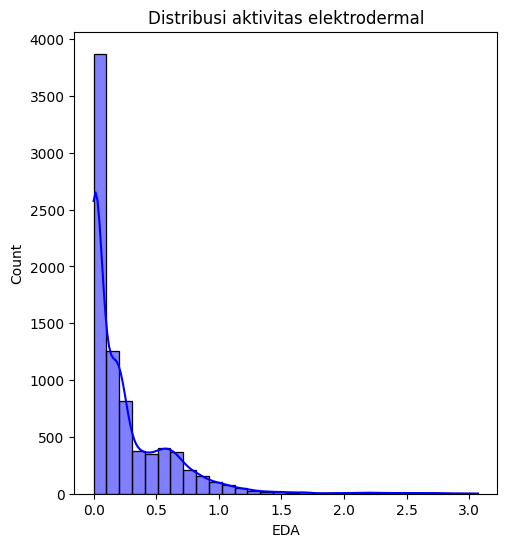

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(combined_df['EDA'], bins=30, kde=True, color='blue')
plt.title('Distribusi aktivitas elektrodermal')
plt.show()

From the histogram, it can be seen that most of the electrodermal activity levels during the exam are between 0-1.5.

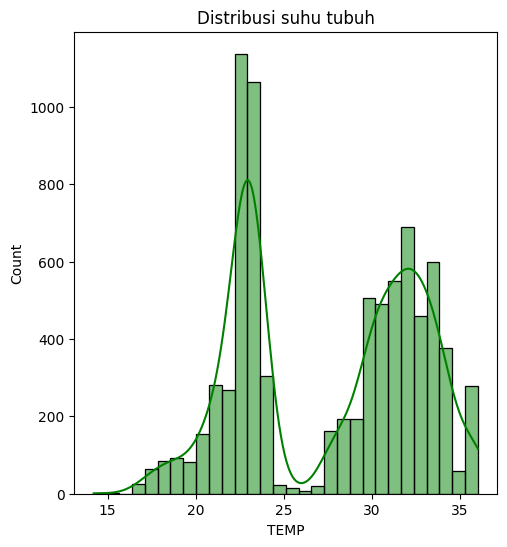

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(combined_df['TEMP'], bins=30, kde=True, color='green')
plt.title('Distribusi suhu tubuh')
plt.show()

Unlike electrodermal activity, the body temperature of students during the exam varies. Most body temperatures are between 20-25 degrees and 30-35 degrees.

Viewing the correlation between electrodermal activity (EDA) and body temperature (temp).

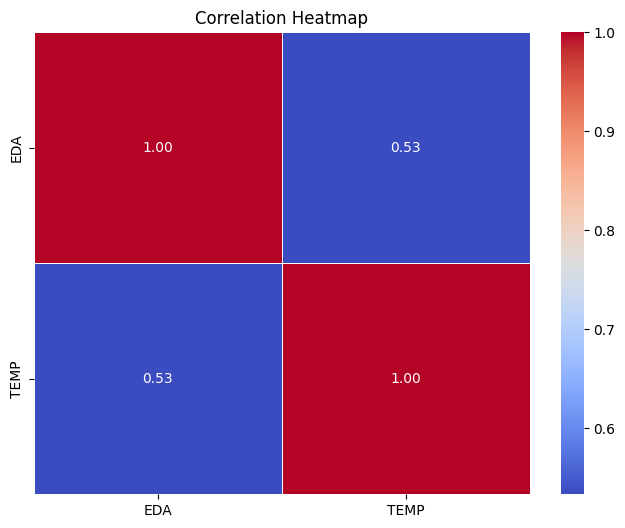

In [ ]:
correlation_matrix = combined_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Viewing the data distribution of electrodermal activity (EDA) and body temperature (temp) using a scatter plot.

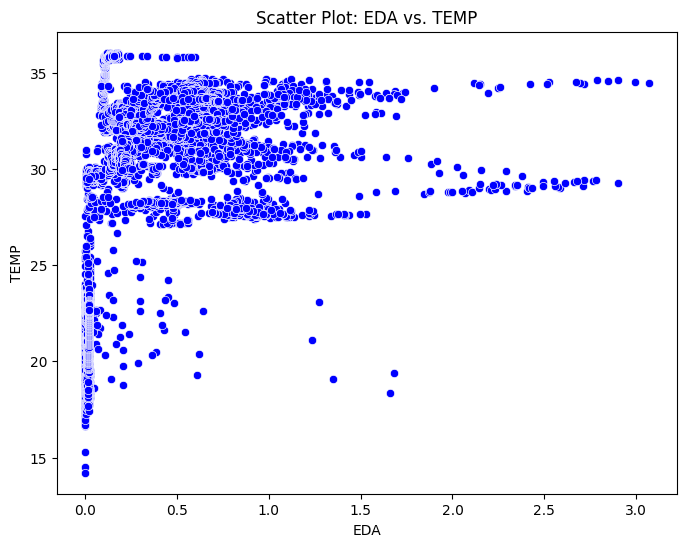

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='EDA', y='TEMP', data=combined_df, color='blue')
plt.title('Scatter Plot: EDA vs. TEMP')
plt.xlabel('EDA')
plt.ylabel('TEMP')
plt.show()

From the scatter plot, several observations can be made:
* There is a correlation between electrodermal activity (EDA) and body temperature (TEMP).
* As body temperature increases, electrodermal activity also increases.
* There is a lot of variation in the data, such as students with high electrodermal activity and low body temperature, or vice versa. This is related to factors outside of stress, such as caffeine consumption.

Melihat dan menangani outliers pada data

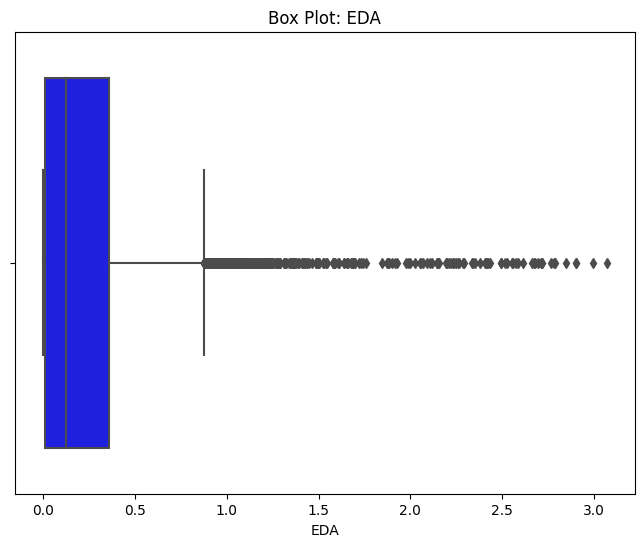

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=combined_df['EDA'], color='blue')
plt.title('Box Plot: EDA')
plt.show()

From the boxplot, it can be seen that there are many outliers in the EDA feature. However, I decided not to handle these outliers because EDA varies from person to person and can be influenced by many factors. Additionally, the silhouette score during the modeling stage was better when using the EDA feature as it is.

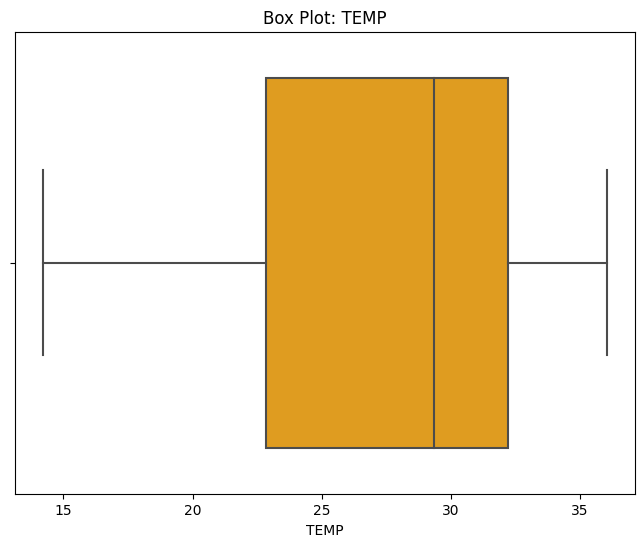

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=combined_df['TEMP'], color='orange')
plt.title('Box Plot: TEMP')
plt.show()

From the boxplot, it can be seen that the body temperature of the students is normally distributed and there are no outliers.

#Clustering dengan K-Means

In [ ]:
X = combined_df
X.head()

,EDA,TEMP
0,0.062872,21.7213
1,0.023666,22.1836
2,0.023576,22.3862
3,0.023769,22.1080
4,0.023743,21.8282


Performing feature scaling using MinMax Scaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
features = ['EDA', 'TEMP']
X[features] = scaler.fit_transform(X[features])
X.head()

,EDA,TEMP
0,0.020489,0.344013
1,0.007712,0.365187
2,0.007683,0.374466
3,0.007746,0.361724
4,0.007737,0.348909


In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

Determining the optimal value of k using the elbow method.

In [ ]:
k_values = range(1, 11)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X[['EDA', 'TEMP']])
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

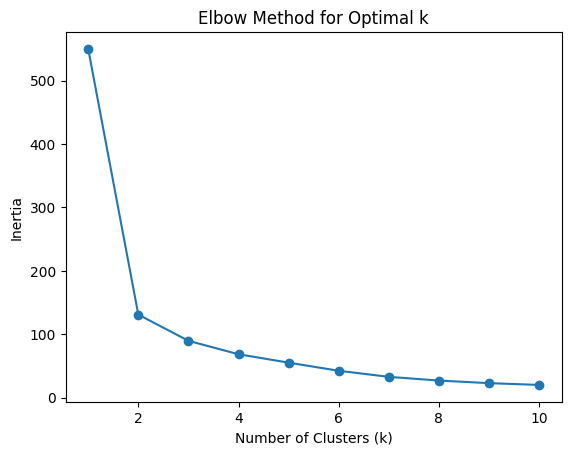

In [ ]:
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

From the graph, it can be seen that the 'elbow' is at the cluster number 3. Therefore, the value of k to be used is 3.

Splitting the dataset into training and testing data.

In [ ]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

Modelling with KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [ ]:
X_train['Cluster'] = kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


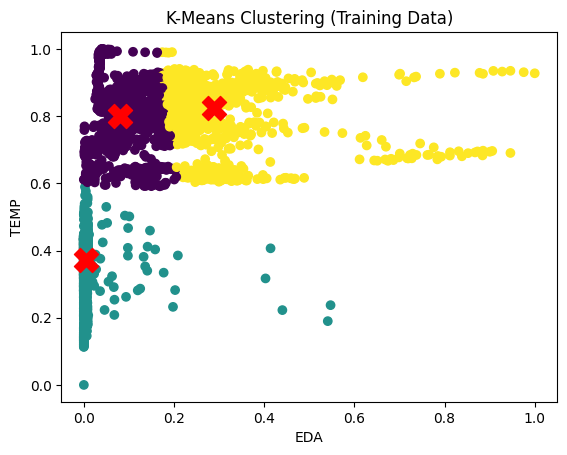

In [ ]:
plt.scatter(X_train['EDA'], X_train['TEMP'], c=X_train['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering (Training Data)')
plt.xlabel('EDA')
plt.ylabel('TEMP')
plt.show()

In [ ]:
X_test['Cluster'] = kmeans.predict(X_test)

Checking how good the clustering results are with the silhouette score.

In [ ]:
silhouette_avg = silhouette_score(X_train, X_train['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.9013864661180796


In [ ]:
print(X_train['Cluster'].value_counts())

1    2893
0    2576
2    1075
Name: Cluster, dtype: int64


#DBScan

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
X = combined_df
X.head()

,EDA,TEMP
0,0.020489,0.344013
1,0.007712,0.365187
2,0.007683,0.374466
3,0.007746,0.361724
4,0.007737,0.348909


In [ ]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

Modeling using DBSCAN. In DBSCAN, there are two parameters: epsilon and minimum samples. I used epsilon 0.05 and minimum samples 25 after testing various combinations of epsilon and min_samples. I obtained the best silhouette score with these epsilon and minimum samples values.

In [ ]:
features = ['EDA', 'TEMP']
dbscan = DBSCAN(eps=0.05, min_samples=25)
X_train['Cluster'] = dbscan.fit_predict(X_train[features])
X_test['Cluster'] = dbscan.fit_predict(X_test[features])

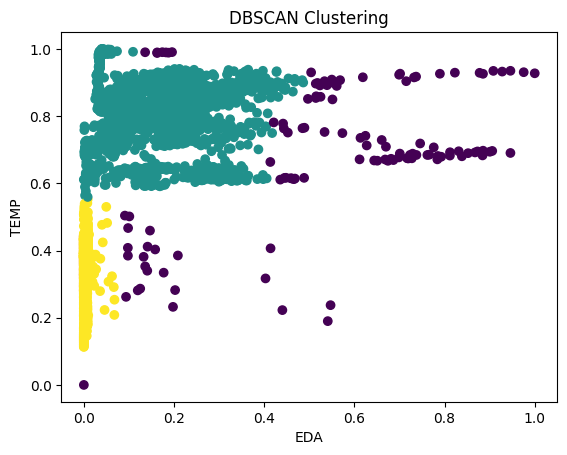

In [ ]:
plt.scatter(X_train['EDA'], X_train['TEMP'], c=X_train['Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('EDA')
plt.ylabel('TEMP')
plt.show()

Checking how good the clustering results are with the silhouette score.

In [ ]:
silhouette_avg = silhouette_score(X_train[features], X_train['Cluster'].astype('category'))
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.709996046837131


#Conclusion

Based on the silhouette score results, it can be concluded that the cluster quality produced by the K-means method (0.9014) is higher compared to the DBSCAN method (0.71). The higher the silhouette score, the better the quality of the clusters. Therefore, the higher silhouette score of K-means indicates that the clusters generated by K-means have better separation between clusters and objects within the clusters. In contrast, the lower silhouette score of the DBSCAN method may indicate the presence of objects that are difficult to cluster properly, or a lack of separation between clusters in the analyzed data.